# Topic 18-14: Bode Design Approach

In [15]:
import requests as req
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

p = Symbol('p')
z = Symbol('z')
s = sympy.Symbol('s')       # define `s` as symbol
j = complex(0,1)

try:
    import bodas
except:
    %pip install bodas
    import bodas

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d
from control import bode_plot, nyquist_plot
from control_materials import *

Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found


# Bode design Example 1 - VDV 8.16 (18-14)

In [16]:
G = tf(100,np.convolve([1, 1],np.convolve([1, 4],[1, 10])))
wc_des = 9
PM = 45
e_ss_desired = 0.1
K_dc_desired = 1/e_ss_desired - 1

# try 1 - use a gain to solve
K_dc_G = find_Kp(G)
K_required = K_dc_desired/K_dc_G
L = K_required*G
Gcl = feedback(L,1)

w = np.sort(np.append(logspace(-2,np.log10(100),300),wc_des))
[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
[Gclm,Gclp,Gclw] = bode_plot(Gcl,plot=False,omega=w)

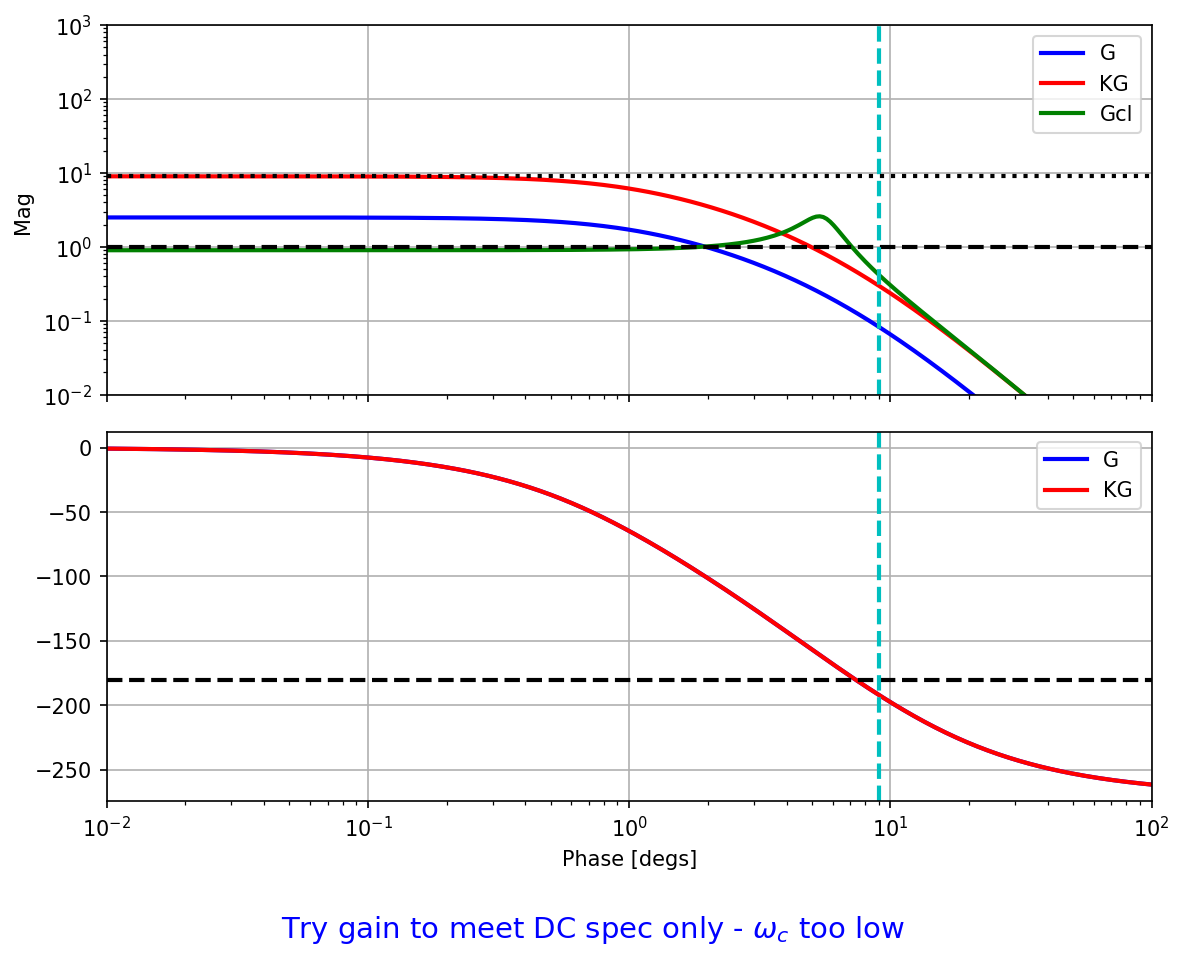

In [17]:

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,Gm,'b-',label='G')
ax[0].loglog(Gw,K_required*Gm,'r-',label='KG')
ax[0].loglog(Gclw,Gclm,'g-',label='Gcl')
ax[0].axhline(y=1,c='k',ls="--")
ax[0].axvline(x=wc_des,c='c',ls="--")
ax[0].legend()
ax[0].set_ylim([.01,1000])
ax[0].set_ylabel("Mag ")
ax[0].axhline(y=K_dc_desired,c='k',ls=":")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gw,pshift(Gp)*r2d,'r-',label='KG')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].axvline(x=wc_des,c='c',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_xlabel("Phase [degs]")
caption("Try gain to meet DC spec only - $\omega_c$ too low",fig,yloc=-0.05)
plt.legend()
savefig('./figs/L17_8.pdf',dpi=600)
plt.show()


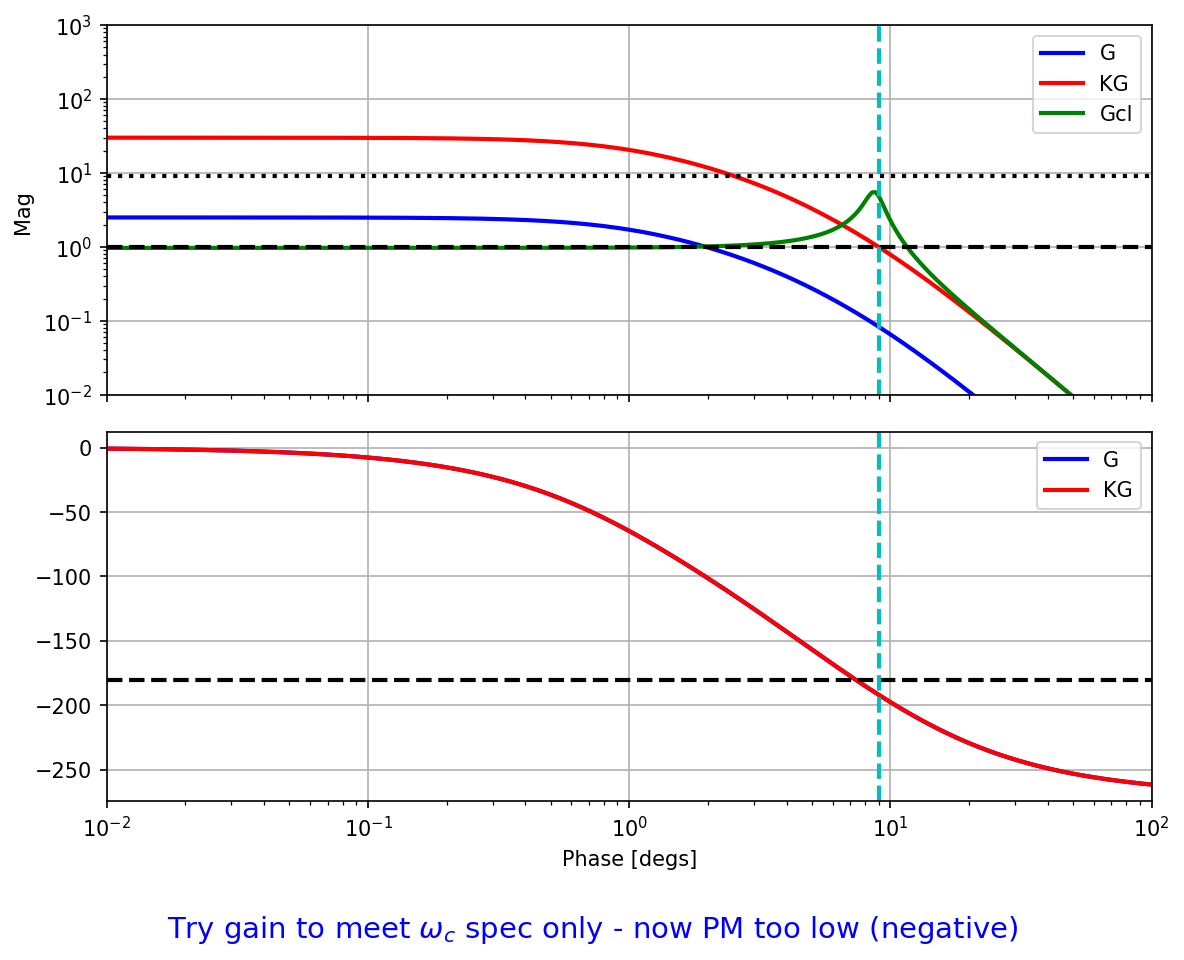

In [18]:
# Try 2 - set gain to meet wc
Gf = G(j*wc_des)
K_wc = 1/np.abs(Gf) # raise plant gain to set w_c
L = K_wc*G
Gcl = feedback(L,1)
[Gclm,Gclp,Gclw] = bode_plot(Gcl,plot=False,omega=w)

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,Gm,'b-',label='G')
ax[0].loglog(Gw,K_wc*Gm,'r-',label='KG')
ax[0].loglog(Gclw,Gclm,'g-',label='Gcl')
ax[0].axhline(y=1,c='k',ls="--")
ax[0].axvline(x=wc_des,c='c',ls="--")
ax[0].legend()
ax[0].set_ylim([.01,1000])
ax[0].set_ylabel("Mag ")
ax[0].axhline(y=K_dc_desired,c='k',ls=":")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gw,pshift(Gp)*r2d,'r-',label='KG')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].axvline(x=wc_des,c='c',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
#ax[1].set_ylim([-270,0])
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_xlabel("Phase [degs]")
caption("Try gain to meet $\omega_c$ spec only - now PM too low (negative)",fig)
plt.legend()
savefig('./figs/L17_9.pdf',dpi=600)
plt.show()


In [19]:
# Try 3 - add lead 
wc_lead = 12 # higher than required, but try to increase low freq gain
Gc_lead = lead_design(G, wc_des = wc_lead, PM = PM)
L_lead = G*Gc_lead
Gcl_lead = feedback(L_lead,1)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
[Gcm,Gcp,Gcw] = bode_plot(Gc_lead,plot=False,omega=w)
[Lm,Lp,Lw] = bode_plot(L_lead,plot=False,omega=w)
[Gclm,Gclp,Gclw] = bode_plot(Gcl_lead,plot=False,omega=w)

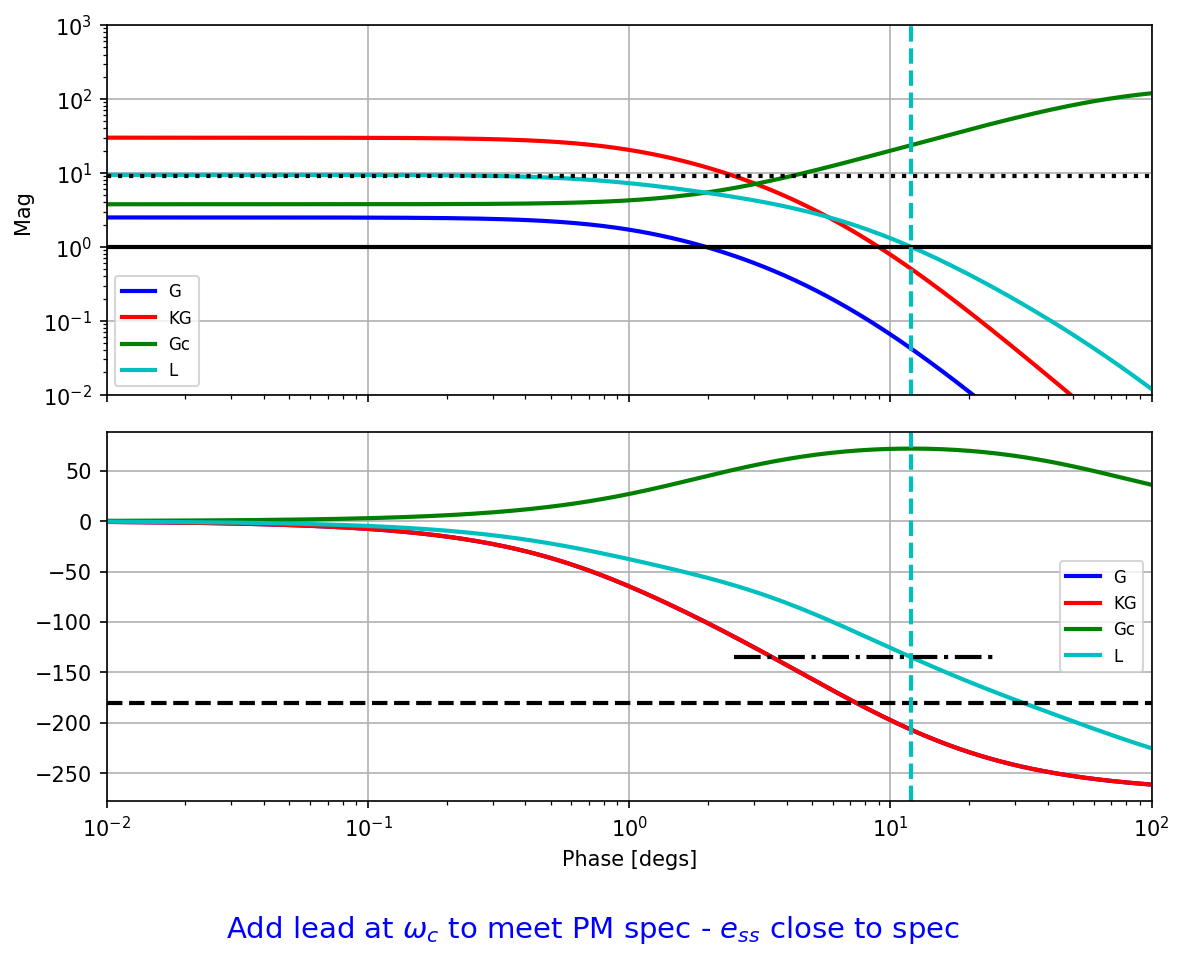

In [20]:
fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,Gm,'b-',label='G')
ax[0].loglog(Gw,K_wc*Gm,'r-',label='KG')
ax[0].loglog(Gw,Gcm,'g-',label='Gc')
ax[0].loglog(Gw,Lm,'c-',label='L')
ax[0].axhline(y=1,c='k',ls="-")
ax[0].axvline(x=wc_lead,c='c',ls="--")
ax[0].legend(fontsize=8)
ax[0].set_ylim([.01,1000])
ax[0].set_ylabel("Mag ")
ax[0].axhline(y=K_dc_desired,c='k',ls=":")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gw,pshift(Gp)*r2d,'r-',label='KG')
ax[1].semilogx(Gw,pshift(Gcp)*r2d,'g-',label='Gc')
ax[1].semilogx(Gw,pshift(Lp)*r2d,'c-',label='L')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].axhline(y=-180+PM,xmin=0.6,xmax=.85,c='k',ls="-.")
ax[1].axvline(x=wc_lead,c='c',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_xlabel("Phase [degs]")
caption("Add lead at $\omega_c$ to meet PM spec - $e_{ss}$ close to spec",fig,yloc=-0.05)
plt.legend(fontsize=8)
savefig('./figs/L17_10.pdf',dpi=600)
plt.show()

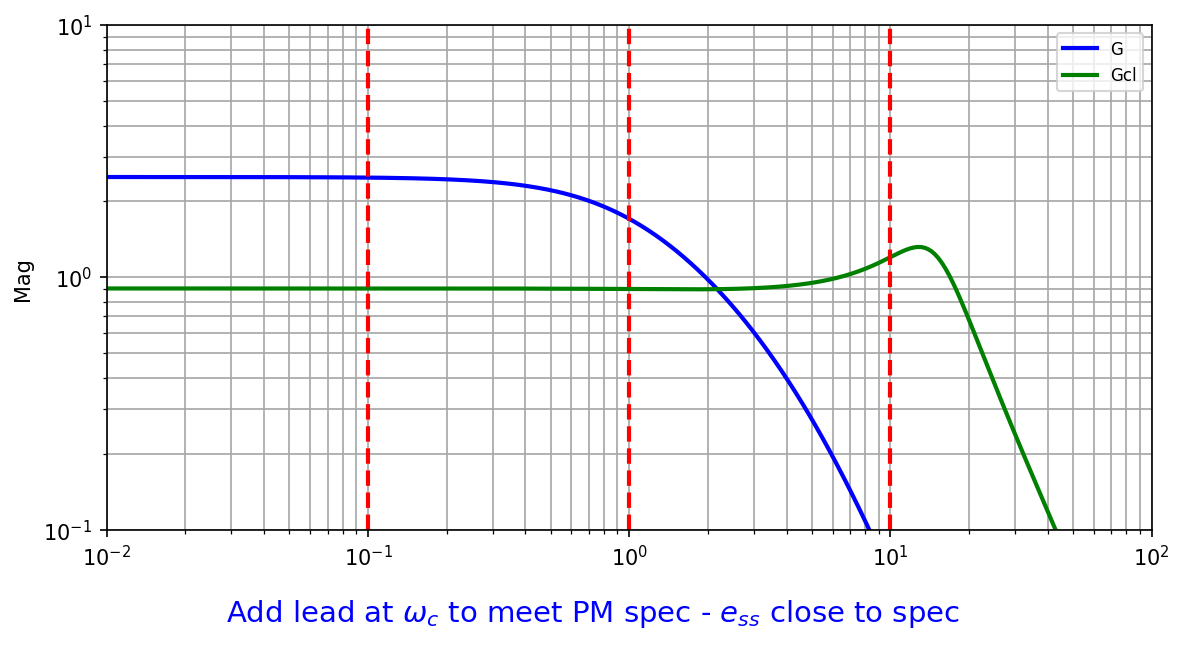

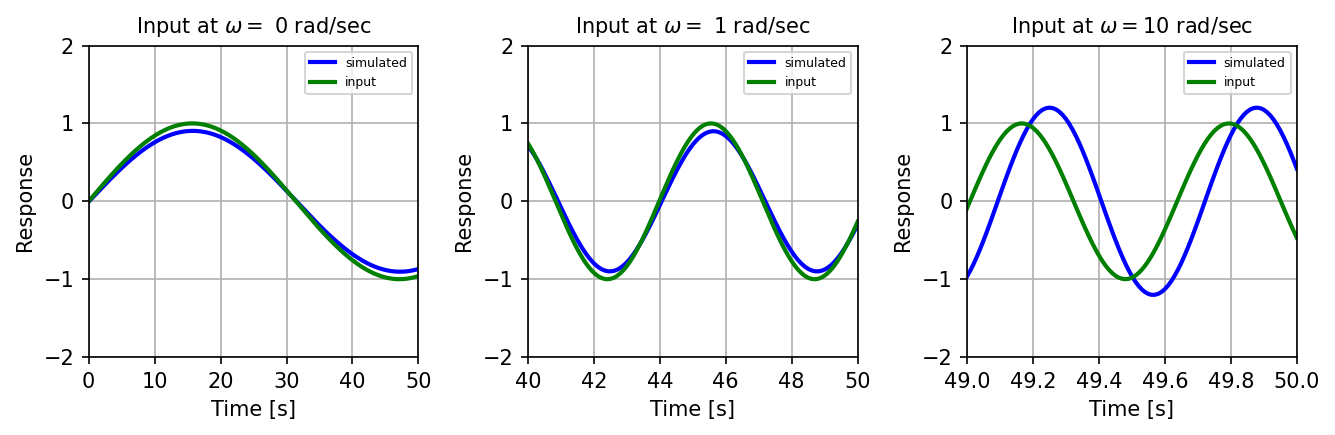

In [21]:
# Add lead 
Tf = 50 # final time
omega = [.1,1,10] # test reponse at these frequencies

[Gclm,Gclp,Gclw] = bode_plot(Gcl_lead,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(8, 4),dpi=150,sharex = True)
ax.loglog(Gw,Gm,'b-',label='G')
ax.loglog(Gclw,Gclm,'g-',label='Gcl')
ax.legend(fontsize=8)
ax.grid(True, which="both", ls="-",color='0.65')
[ax.axvline(x=x,c='r',ls='--') for x in omega]
ax.set_ylim([.1,10])
ax.set_ylabel("Mag ")
caption("Add lead at $\omega_c$ to meet PM spec - $e_{ss}$ close to spec",fig,yloc=-0.05)
plt.legend(fontsize=8)
savefig('./figs/L17_10a.pdf',dpi=600)
plt.show()

t = np.linspace(0,Tf,Tf*100)
y_sim = np.zeros((len(t),len(omega)))
U = np.copy(y_sim)
for kk,ww in enumerate(omega):
    u = np.sin(ww*t)
    U[:,kk] = u
    y,_,_ = lsim(Gcl_lead,u,t)
    y_sim[:,kk] = y

fig, ax = plt.subplots(1,3,figsize=(9, 3),dpi=150)
for kk,ww in enumerate(omega):
    ax[kk].plot(t,y_sim[:,kk],'b-',label='simulated')
    ax[kk].plot(t,U[:,kk],'g-',label='input')
    ax[kk].set_xlabel("Time [s]")
    ax[kk].set_ylabel("Response")
    ax[kk].set_ylim([-2,2])
    ax[kk].legend(fontsize=6)
    ax[kk].set_title(r'Input at $\omega=${:2.0f} rad/sec'.format(ww))
ax[0].set_xlim([max(t)-50,max(t)])
ax[1].set_xlim([max(t)-10,max(t)])
ax[2].set_xlim([max(t)-1,max(t)])
savefig("./figs/L17_11.pdf", dpi=600)
plt.show()

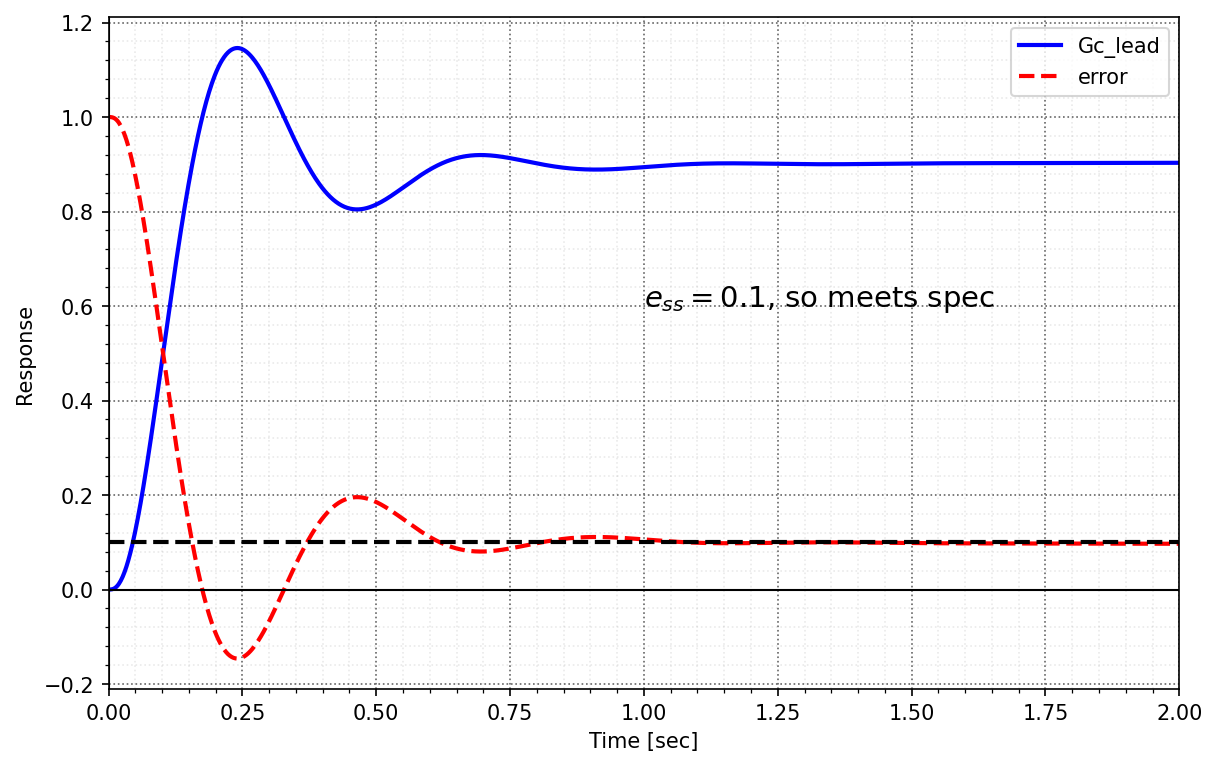

In [23]:
# check SS error in step
Tf = 2
y_lead,t_lead = step(Gcl_lead,Tf)
fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax.plot(t_lead,y_lead,'b-',label='Gc_lead')
ax.plot(t_lead,1-y_lead,'r--',label='error')
ax.axhline(y = e_ss_desired,color='k',ls='--')
nicegrid(ax)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Response')
plt.legend()
plt.text(1, 0.6, r"$e_{ss} = 0.1$, so meets spec", fontsize=14)
savefig("./figs/L17_11a.pdf", dpi=600)
plt.show()